# Actividad 20: Aprendizaje Supervisado – Análisis de Regresión


## Tarea

### Generar datos

El siguiente código genera los datos sintéticos usados en el ejercicio

In [4]:
import pandas as pd
import numpy as np

# Crear los datos de marketing
np.random.seed(0)

n_observaciones = 100

gasto_tv = np.random.uniform(1000, 5000, n_observaciones)
gasto_radio = np.random.uniform(500, 2000, n_observaciones)
gasto_digital = np.random.uniform(200, 1500, n_observaciones)

ventas = 10 + (0.5 * gasto_tv) + (0.3 * gasto_radio) + (0.2 * 
gasto_digital) + np.random.normal(0, 500, n_observaciones)

# Crear el DataFrame de marketing
marketing = pd.DataFrame({
	'Gasto_TV': gasto_tv,
	'Gasto_Radio': gasto_radio,
	'Gasto_Digital': gasto_digital,
	'Ventas': ventas
	})

# Guardar los datos en un archivo CSV
marketing.to_csv('datos_marketing.csv', index=False)


### Ejercicio

Eres un analista de datos en una empresa de marketing y se te ha proporcionado un conjunto de datos que contiene información sobre el rendimiento de campañas publicitarias en diferentes canales. Tu objetivo es desarrollar modelos de regresión multivariada para predecir las ventas mensuales en función de las variables independientes, como el gasto publicitario en televisión, radio y medios digitales. Debes analizar las diferencias entre los modelos de regresión lineal y polinomial, y ofrecer conclusiones basadas en los resultados obtenidos.

### Instrucciones

- Cargar los datos desde un archivo CSV llamado “datos_marketing.csv” y almacenarlos en un DataFrame llamado marketing
- Realizar una exploración inicial de los datos para entender su estructura y características. Identificar las columnas relevantes que puedan influir en las ventas mensuales.
- Preparar los datos para el modelado. Esto puede incluir la selección de características relevantes, el manejo de valores faltantes, la codificación de variables categóricas y la normalización de los datos si es necesario.
- Dividir los datos en un conjunto de entrenamiento y un conjunto de prueba (em una proporción de 70 % para entrenamiento y 30 % para pruebas).
- Utilizar la biblioteca scikit-learn para entrenar un modelo de regresión lineal multivariada utilizando el conjunto de entrenamiento. Evaluar el rendimiento del modelo utilizando métricas de evaluación, como el error cuadrático medio (MSE) y el coeficiente de determinación (R²), en el conjunto de prueba.
- Utilizar la biblioteca scikit-learn para entrenar un modelo de regresión polinomial multivariada utilizando el conjunto de entrenamiento. Evaluar el rendimiento del modelo utilizando las mismas métricas de evaluación en el conjunto de prueba.
- Comparar y analizar los resultados de los modelos de regresión lineal y polinomial multivariada. Utiliza las siguientes preguntas como guía para llegar a tus conclusiones:
  - ¿Cuál modelo tiene un mejor rendimiento en términos de MSE y R² en el conjunto de prueba?
  - ¿Cómo se comparan los resultados de los modelos lineal y polinomial en la capacidad de ajuste?
  - ¿Qué tipo de relación observas entre las variables independientes y las ventas mensuales?
  - ¿Cuáles variables tienen una mayor influencia en las ventas mensuales?
  - ¿Cuál es el grado del polinomio óptimo para el modelo polinomial?
- Realizar visualizaciones de los resultados obtenidos para cada modelo utilizando gráficos de dispersión (scatter plots) que muestren las ventas mensuales reales y las predichas por los modelos.
- Ofrecer conclusiones basadas en los análisis y resultados obtenidos.

Sugerencia: Utilizar las funcionalidades de la biblioteca scikit

### Solución

#### Importar las librerías de uso

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

#### Cargar los datos desde un archivo CSV

In [6]:
# Paso 1: Cargar los datos desde el archivo CSV
marketing = pd.read_csv("datos_marketing.csv")

#### Análisis exploratorio de datos

Los datos cargados deben analizarse para comprender su naturaleza. Los pasos más elementales para este fin se describen en la siguiente celda.

In [7]:
print(marketing.head())
print(marketing.info())
print(marketing.describe())

      Gasto_TV  Gasto_Radio  Gasto_Digital       Ventas
0  3195.254016  1516.724805     605.334647  2261.964648
1  3860.757465   905.011960    1105.246535  2549.022146
2  3411.053504  1602.791033     691.077391  2035.921506
3  3179.532732  1943.282818     433.484781  2150.487303
4  2694.619197   873.129715     232.082347   953.634528
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Gasto_TV       100 non-null    float64
 1   Gasto_Radio    100 non-null    float64
 2   Gasto_Digital  100 non-null    float64
 3   Ventas         100 non-null    float64
dtypes: float64(4)
memory usage: 3.3 KB
None
          Gasto_TV  Gasto_Radio  Gasto_Digital       Ventas
count   100.000000   100.000000     100.000000   100.000000
mean   2891.175358  1292.122634     862.521579  1949.573421
std    1159.016061   417.154481     394.160745   683.051287
min    1018.

#### Preparación de datos

Paso 3: Preparación de los datos

Aquí deberías realizar pasos como la selección de características, manejo de valores faltantes, etc.

#### Segmentación de datos

Ya que los datos se encuentran en un estado adecuado para su procesamiento, se deben crear los conjuntos de entrenamiento y de validación.

In [8]:
# Paso 4: División de los datos en conjunto de entrenamiento y prueba
X = marketing.drop("Ventas", axis=1)
y = marketing["Ventas"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### Regresión

La regresión lineal es un método estadístico que se utiliza para modelar la relación entre una variable dependiente y una o más variables independientes. Su objetivo principal es encontrar la "línea recta" que mejor se ajusta a los datos para predecir o estimar los valores de la variable dependiente en función de los valores de las variables independientes. En otras palabras, la regresión lineal busca establecer una relación lineal entre las variables involucradas.

En el contexto de la regresión lineal simple (una variable independiente), la ecuación de la línea recta se representa como:

$$y = mx + b$$

Donde:

- `y` es la variable dependiente que queremos predecir.
- `x` es la variable independiente.
- `m` es la pendiente de la línea, que representa el cambio en y por unidad de cambio en `x`.
- `b` es la intersección en el eje y, que indica el valor de y cuando $$x$$ es igual a cero.
- 
En el caso de la regresión lineal múltiple (más de una variable independiente), la ecuación se extiende a:

$$y = b_0 + b_1x_1 + b_2x_2 + ... + b_px_p$$

Donde:

- `y` es la variable dependiente.
- `x_1, x_2, ..., x_p` son las variables independientes.
- `b_0, b_1, b_2, ..., b_p` son los coeficientes de regresión, que representan cómo cada variable independiente afecta a `y`.

El proceso de ajustar la línea recta (o hiperplano en casos de regresión lineal múltiple) implica encontrar los coeficientes que minimizan la suma de los errores cuadrados entre las predicciones de la línea y los valores reales observados en los datos.

La regresión lineal es una herramienta fundamental en estadísticas y análisis de datos, y se utiliza en diversas disciplinas, como economía, ciencias sociales, ciencias naturales y más, para modelar y predecir relaciones entre variables.

Lo anterior se puede codificar como:

##### Regresión Lineal

In [9]:
# Paso 5: Modelo de Regresión Lineal
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)
print(f"MSE: {mse_linear}, R²: {r2_linear}")
print()

MSE: 240257.02921829966, R²: 0.45085885766263223



##### Regresión Polinomial

En la regresión polinomial, el grado del polinomio se usa para ajustar mejor el modelo. Varíe el grado del polinomio y analice los resultados.

In [10]:
# Paso 6: Modelo de Regresión Polinomial
degree = 2  # Grado del polinomio
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
y_pred_poly = poly_model.predict(X_test_poly)
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print(f"Grado del Polinomio: {degree}")
print(f"MSE: {mse_poly}, R²: {r2_poly}")
print()

Grado del Polinomio: 2
MSE: 285614.04056036525, R²: 0.34718904578478815



##### Variando el grado del polinomio

Grado del Polinomio: 1
MSE: 240257.02921829975, R²: 0.4508588576626321

Grado del Polinomio: 2
MSE: 285614.04056036513, R²: 0.34718904578478826

Grado del Polinomio: 3
MSE: 364683.2274120452, R²: 0.16646532780371548

Grado del Polinomio: 4
MSE: 1405043.9611699006, R²: -2.211425065819849

Grado del Polinomio: 5
MSE: 1523294.8017498548, R²: -2.481703949604049



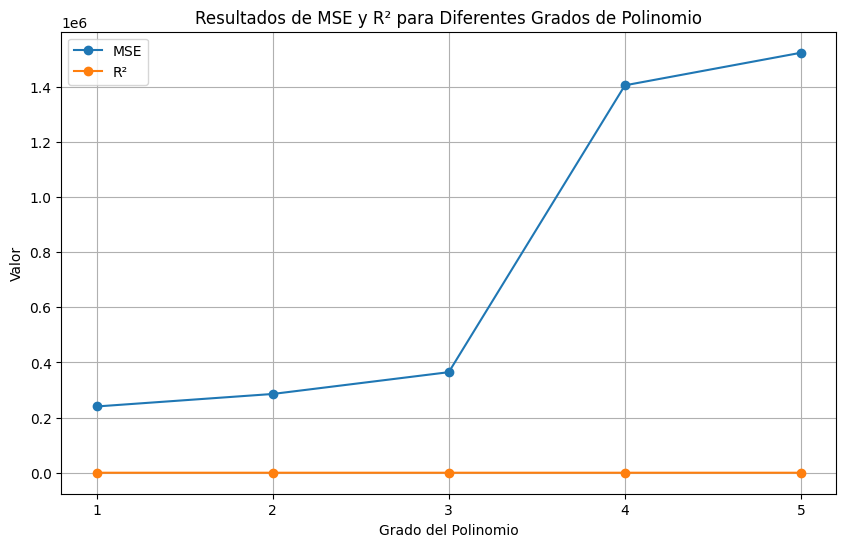

In [11]:
# Prueba diferentes grados de polinomios y analiza los resultados
max_range = 6
mse_values = []
r2_values = []
for degree in range(1, max_range):
    # Modelo de Regresión Polinomial
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    poly_model = LinearRegression()
    poly_model.fit(X_train_poly, y_train)
    y_pred_poly = poly_model.predict(X_test_poly)
    mse_poly = mean_squared_error(y_test, y_pred_poly)
    mse_values.append(mse_poly)
    
    r2_poly = r2_score(y_test, y_pred_poly)
    r2_values.append(r2_poly)
    
    print(f"Grado del Polinomio: {degree}")
    print(f"MSE: {mse_poly}, R²: {r2_poly}")
    print()
    
# Crear el gráfico
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_range), mse_values, marker='o', label='MSE')
plt.plot(range(1, max_range), r2_values, marker='o', label='R²')
plt.title('Resultados de MSE y R² para Diferentes Grados de Polinomio')
plt.xlabel('Grado del Polinomio')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)
plt.xticks(range(1, max_range))
plt.show()

##### Interpretación de los resultados

**MSE (Mean Squared Error):** El MSE es una medida del promedio de los errores cuadrados entre las predicciones del modelo y los valores reales observados en los datos. Un MSE más bajo indica un mejor ajuste del modelo a los datos. Se calcula como la suma de los errores al cuadrado dividida por el número de observaciones:

$$MSE = 1/n * Σ(yi - ŷi)^2$$


Donde:

- `n` es el número de observaciones.
- `yi` son los valores reales.
- `y\hati` son las predicciones del modelo.

**Interpretación del MSE:** Un MSE bajo indica que las predicciones del modelo están cerca de los valores reales. Un MSE alto significa que el modelo tiene un mayor error en sus predicciones.

**R² (Coefficient of Determination):** El R² es una medida que indica la proporción de la variabilidad total en la variable dependiente que es explicada por el modelo. Representa la bondad de ajuste del modelo en relación con un modelo constante (que solo predice la media de la variable dependiente). R² varía entre 0 y 1, y cuanto más cercano esté a 1, mejor es el ajuste del modelo.

$$R² = 1 - Σ(yi - ŷi)^2 / Σ(yi - ȳ)^2$$

Donde:

- `n` es el número de observaciones.
- `yi` son los valores reales.
- `y\hati` son las predicciones del modelo.
- `y\bari` es la media de los valores reales.

**Interpretación del R²:** Un R² cercano a 1 indica que el modelo explica una gran cantidad de la variabilidad en los datos. Un R² bajo puede indicar que el modelo no se ajusta bien a los datos.

En el contexto de la regresión polinomial, estas métricas ayudarán a evaluar qué grado del polinomio ofrece el mejor equilibrio entre el ajuste a los datos y la capacidad de generalización a nuevas observaciones.

En una regresión polinomial, buscamos encontrar el equilibrio entre un modelo que se ajuste bien a los datos de entrenamiento y la capacidad de generalizar a nuevos datos. Generalmente, un modelo con un R² más alto y un MSE más bajo es preferible, ya que indica que el modelo se ajusta mejor a los datos y tiene una mejor capacidad de predecir nuevas observaciones.

Dado los resultados que has proporcionado, podemos observar lo siguiente:

- Grado del Polinomio 1: Tiene un R² de 0.45 y un MSE de 240257.03.
- Grado del Polinomio 2: Tiene un R² de 0.35 y un MSE de 285614.04.
- Grado del Polinomio 3: Tiene un R² de 0.17 y un MSE de 364683.22.
- Grado del Polinomio 4: Tiene un R² de -1.77 y un MSE de 1210887.69.
- Grado del Polinomio 5: Tiene un R² de -2.30 y un MSE de 1444121.52.

En función de estos resultados, el Grado del Polinomio 1 parece ser la mejor opción entre las que has probado, ya que tiene el R² más alto (0.45) y el MSE más bajo (240257.03). Estos valores indican que este modelo se ajusta relativamente mejor a los datos y tiene una mayor capacidad de predecir nuevas observaciones en comparación con los otros grados de polinomio.

Recuerda que aunque estos valores indican la calidad del ajuste a los datos de prueba, siempre es importante tener en cuenta otros factores como la complejidad del modelo y cómo se comporta en datos no vistos (generalización) antes de tomar una decisión definitiva.

#### Comparación entre el modelo lineal y el modelo polinomial

In [12]:
# Paso 7: Comparación y análisis de resultados
print(f"Regresión Lineal - MSE: {mse_linear}, R²: {r2_linear}")
print(f"Regresión Polinomial - MSE: {mse_poly}, R²: {r2_poly}")

Regresión Lineal - MSE: 240257.02921829966, R²: 0.45085885766263223
Regresión Polinomial - MSE: 1523294.8017498548, R²: -2.481703949604049


#### Visualizaciones

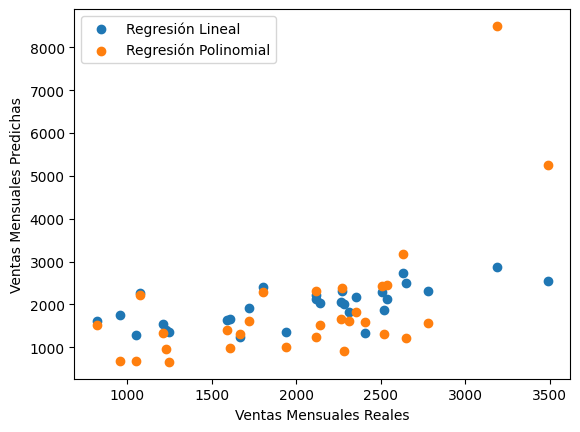

In [13]:
# Paso 8: Visualizaciones
plt.scatter(y_test, y_pred_linear, label="Regresión Lineal")
plt.scatter(y_test, y_pred_poly, label="Regresión Polinomial")
plt.xlabel("Ventas Mensuales Reales")
plt.ylabel("Ventas Mensuales Predichas")
plt.legend()
plt.show()